# Hot Plasma II. Sandbox

Play around with some figures for Paper II

In [38]:
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('papers')
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'EBTEL_analysis/src/'))
import ebtel_dem as ebd
%matplotlib inline

## $T_{eff}$ versus $T$ diff--Emission Measure
### Electron Heating
First, load the data for EBTEL and $T_{eff}$

In [39]:
ebtel_em = ebd.DEMProcess('/data/datadrive2/EBTEL_runs/','electron',2.5,40.0,200.0,'rka4',scaling_suffix='-b1.0',
                         aspect_ratio_factor=10.0)

In [40]:
ebtel_em.import_from_file('/data/datadrive2/EBTEL_figs/electron_heating_runs/alpha2.5/ebtel_L40.0_tpulse200.0_alpha2.5-b1.0_electron_heating.lvl1_em.pickle')

In [41]:
ebtel_em.calc_stats()

In [42]:
teff_em = ebd.DEMProcess('/data/datadrive2/IonPopSolver_runs/','electron',2.5,40.0,200.0,'rka4',scaling_suffix='-b1.0',
                         aspect_ratio_factor=10.0)

In [43]:
teff_em.import_from_file('/data/datadrive2/IonPopSolver_figs/electron_heating_runs/alpha2.5/ebtel_L40.0_tpulse200.0_alpha2.5-b1.0_electron_heating.lvl1_em.pickle')

In [44]:
teff_em.calc_stats()

Now calculate $\xi=\mathrm{EM}_{EBTEL}/\mathrm{EM}_{T_{eff}}$ such that $\xi>1$ implies a deficiency in the $\mathrm{EM}$ due to NEI.

In [47]:
xi = []
for em1,em2 in zip(ebtel_em.em_stats,teff_em.em_stats):
    tmp={'Tdiff':em1['T_mean']}
    tmp['EMdiff'] = em1['em_mean']/em2['em_mean']
    xi.append(tmp)

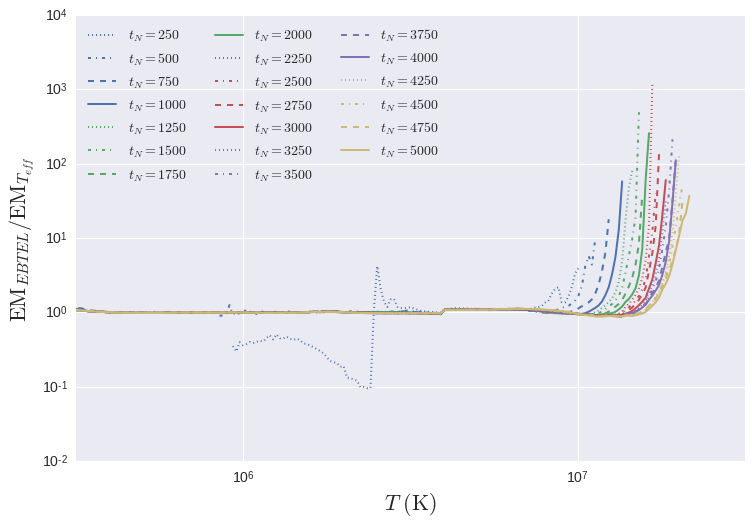

In [53]:
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for x,i,c in zip(xi,range(len(t_wait)),colors):
    ax.plot(x['Tdiff'],x['EMdiff'],label=r'$t_N=%d$'%t_wait[i],color=c,linestyle=styles[i%len(styles)])
ax.set_xscale('log')
ax.set_xlim([10**5.5,10**7.5])
ax.set_yscale('log')
ax.set_xlabel(r'$T$ $\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}_{EBTEL}/\mathrm{EM}_{T_{eff}}$')
ax.legend(loc='best',ncol=3)

### Ion Heating
Now do the same but for the case in which we only heat the ions.

In [54]:
ebtel_em = ebd.DEMProcess('/data/datadrive2/EBTEL_runs/','ion',2.5,40.0,200.0,'rka4',scaling_suffix='-b1.0',
                         aspect_ratio_factor=10.0)
ebtel_em.import_from_file('/data/datadrive2/EBTEL_figs/ion_heating_runs/alpha2.5/ebtel_L40.0_tpulse200.0_alpha2.5-b1.0_ion_heating.lvl1_em.pickle')
ebtel_em.calc_stats()

In [55]:
teff_em = ebd.DEMProcess('/data/datadrive2/IonPopSolver_runs/','ion',2.5,40.0,200.0,'rka4',scaling_suffix='-b1.0',
                         aspect_ratio_factor=10.0)
teff_em.import_from_file('/data/datadrive2/IonPopSolver_figs/ion_heating_runs/alpha2.5/ebtel_L40.0_tpulse200.0_alpha2.5-b1.0_ion_heating.lvl1_em.pickle')
teff_em.calc_stats()

In [56]:
xi = []
for em1,em2 in zip(ebtel_em.em_stats,teff_em.em_stats):
    tmp={'Tdiff':em1['T_mean']}
    tmp['EMdiff'] = em1['em_mean']/em2['em_mean']
    xi.append(tmp)

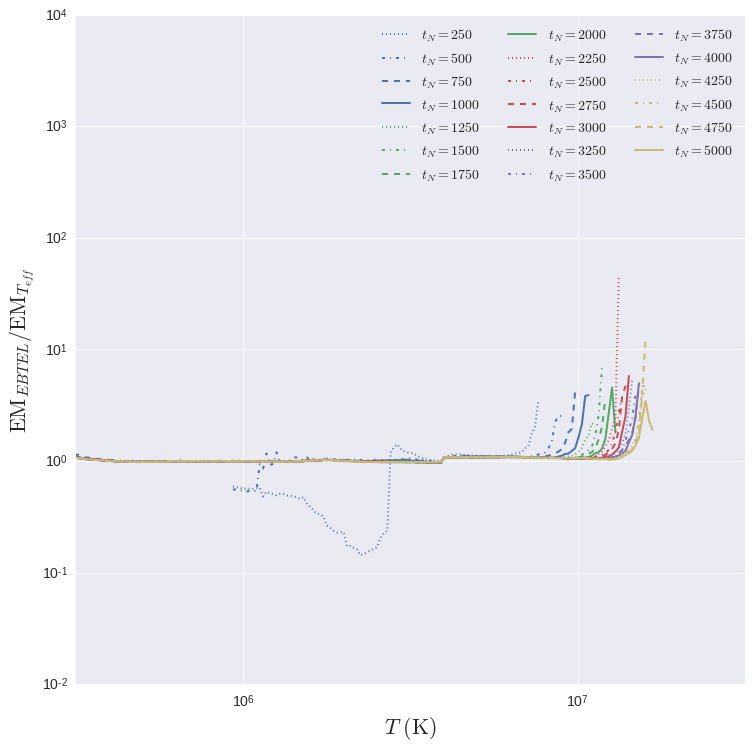

In [58]:
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
for x,i,c in zip(xi,range(len(t_wait)),colors):
    ax.plot(x['Tdiff'],x['EMdiff'],label=r'$t_N=%d$'%t_wait[i],color=c,linestyle=styles[i%len(styles)])
ax.set_xscale('log')
ax.set_xlim([10**5.5,10**7.5])
ax.set_yscale('log')
ax.set_ylim([1e-2,1e+4])
ax.set_xlabel(r'$T$ $\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}_{EBTEL}/\mathrm{EM}_{T_{eff}}$')
ax.legend(loc='best',ncol=3)

## $T,n$ Sample Profiles

Let's try plotting some of the $T_{eff}$ profiles on top of the original temperatures.

In [30]:
teff_sample = np.loadtxt('/data/datadrive2/IonPopSolver_runs/electron_heating_runs/alpha2.5/data/ebtel_L40.0_tn5000-b1.0_tpulse200.0_rka4/ebtel_L40.0_tn5000-b1.0_tpulse200.0_rka4_2.ips_results.txt')

<IPython.core.display.Javascript object>


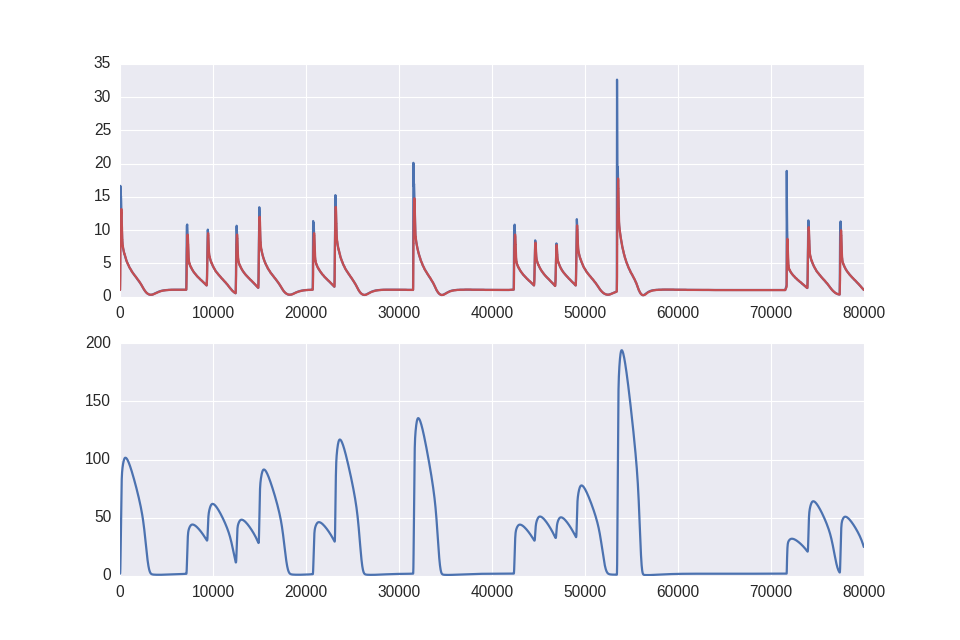

In [32]:
fig,axes=plt.subplots(2,1,figsize=(12,8))
axes[0].plot(teff_sample[:,0],teff_sample[:,1]/1e+6,linestyle='-',color=sns.color_palette('deep')[0])
axes[0].plot(teff_sample[:,0],teff_sample[:,2]/1e+6,linestyle='-',color=sns.color_palette('deep')[2])
axes[1].plot(teff_sample[:,0],teff_sample[:,3]/1e+8,linestyle='-',color=sns.color_palette('deep')[0])